In [22]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [23]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'absth',
            'wgt']


def pattern_assign(name):
    return ''' 
    parameter .* :: .* ({} .* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/]+ {}[^,] [^/]+ / [^/]+ /)
    '''.format(name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [24]:
analysis = scripts.Analysis()

In [25]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band01_wn_10_340',
                          'ng_30/g_descending',
                          'refPTs_P_200_T_250__P_1_T_250',
                          'ighigh_10',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.7__all.7',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [26]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band01_wn_10_340',
                          'ng_30/g_descending',
                          'refPTs_P_200_T_250__P_1_T_250',
                          'ighigh_10',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.7__all.7',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [27]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 30 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [28]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [29]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [30]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [31]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 10

nband = 330

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_1 = 1.

temperature_reference_1 = 250.

pressure_reference_2 = 200.

temperature_reference_2 = 250.

ighigh = 10

ngas = 6      

ng = 30

data absth(:, 1) /

!     thresholds for reference (P, T) low
!     data absth(:, 2) /

data wgt
     &     /30 * .7/

include 'mls75.pro'


In [32]:
fig.display_hrefanchor()

In [33]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [34]:
table_dgdgs.display_hrefanchor()

In [35]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [36]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

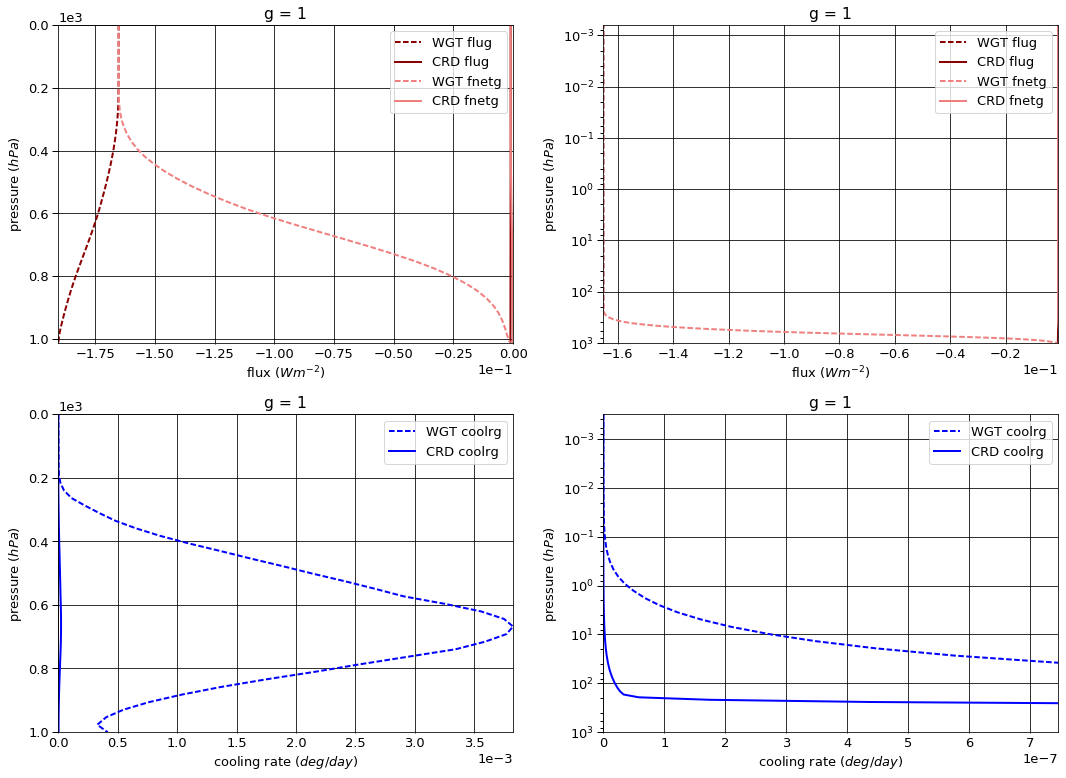

# Figure: flux, cooling rate g-group 2

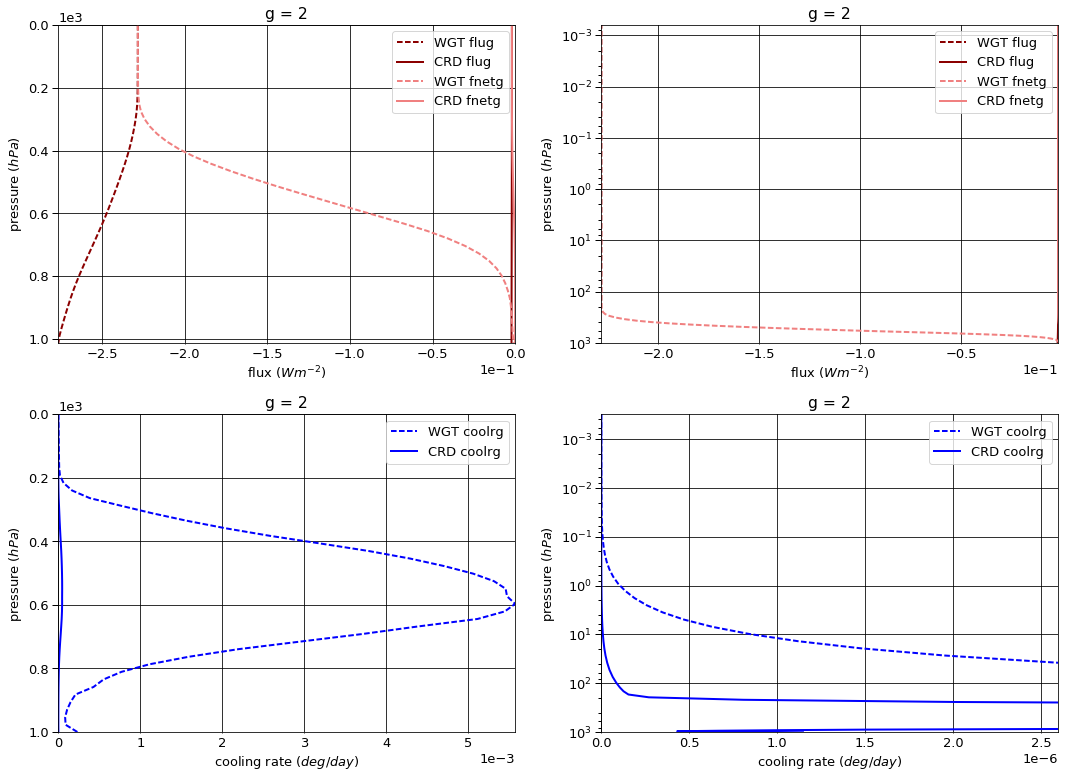

# Figure: flux, cooling rate g-group 3

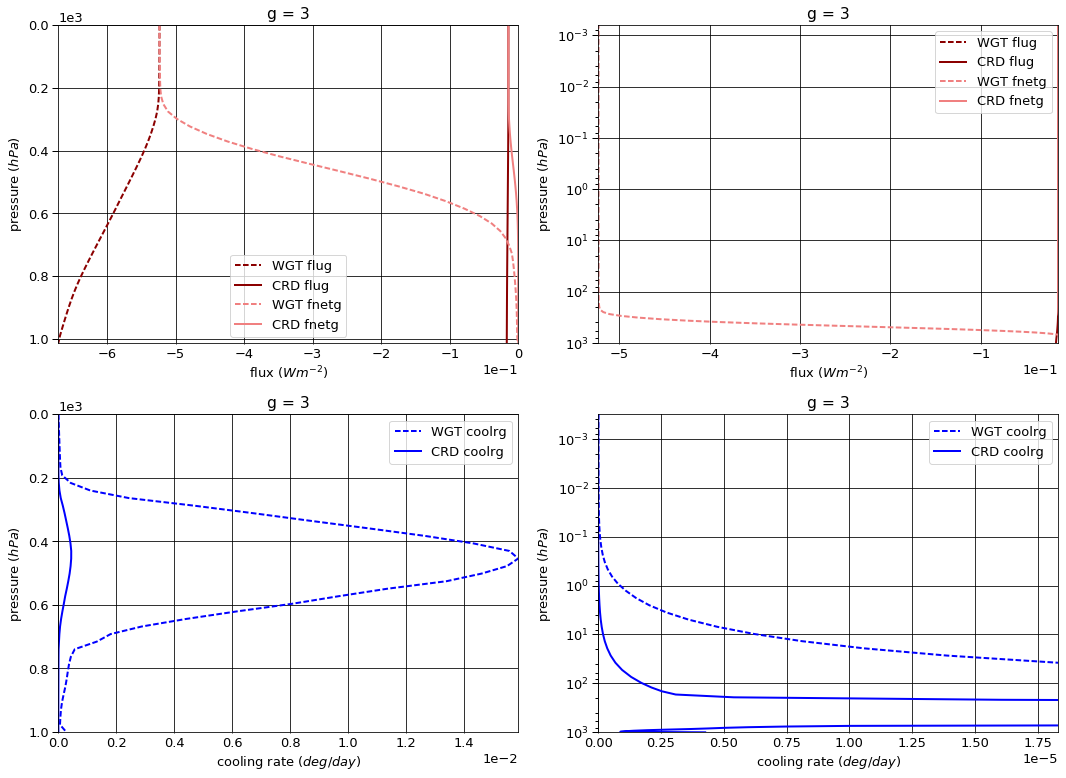

# Figure: flux, cooling rate g-group 4

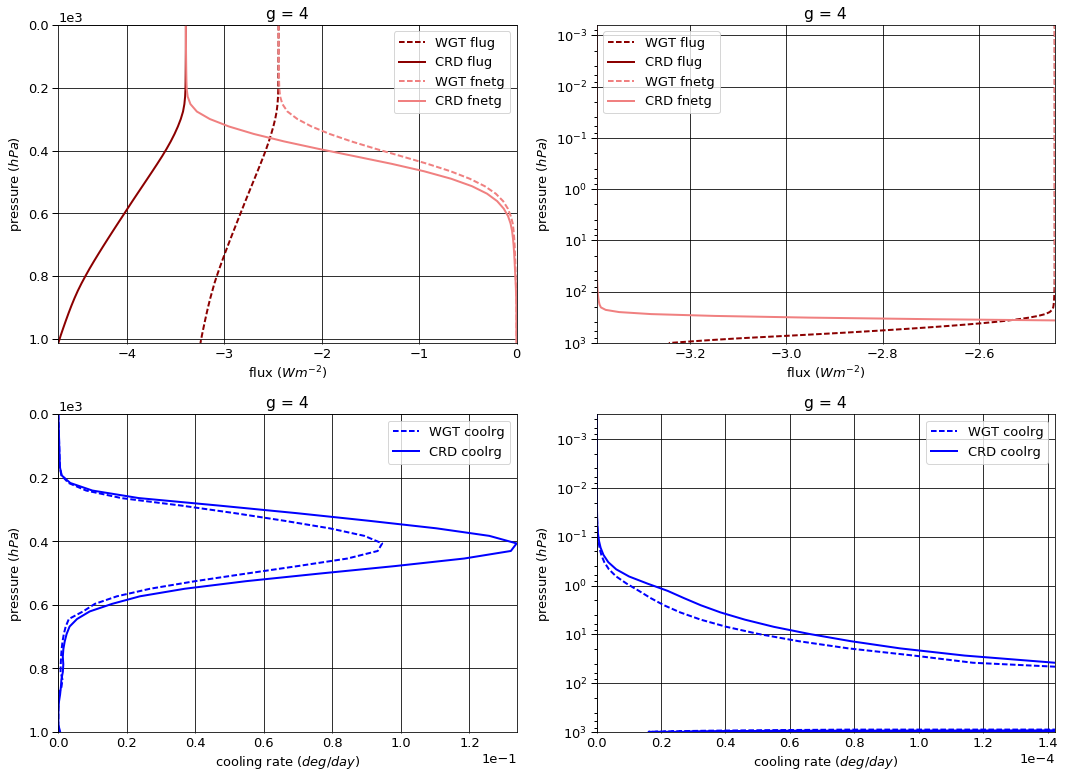

# Figure: flux, cooling rate g-group 5

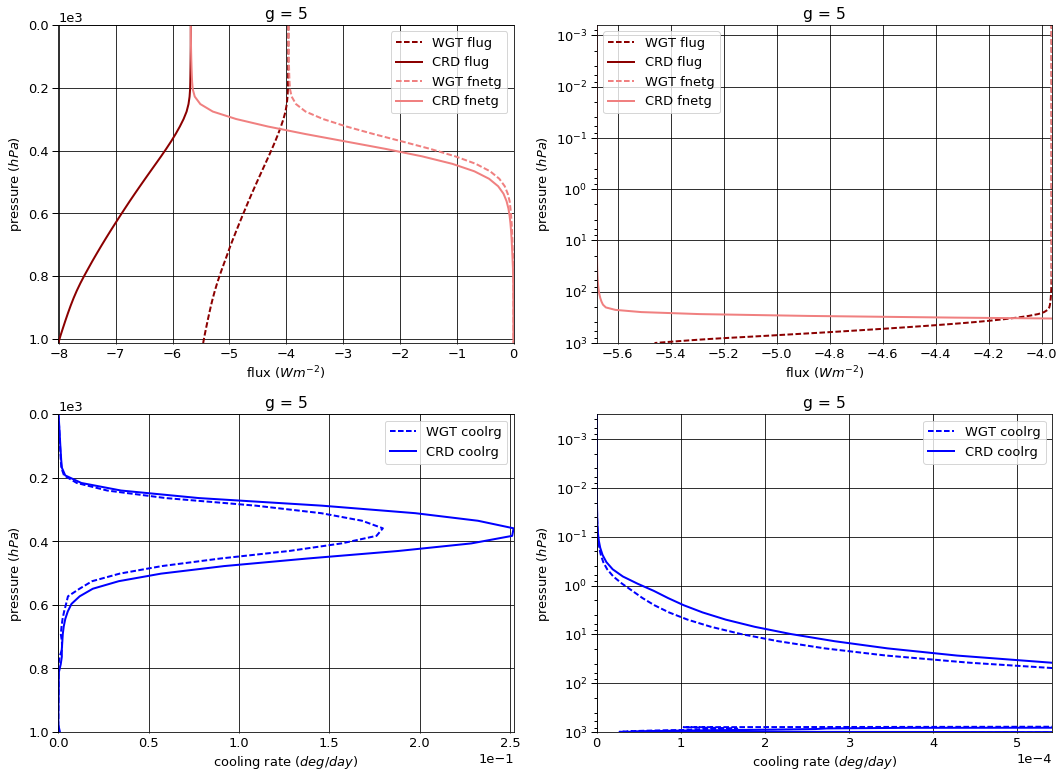

# Figure: flux, cooling rate g-group 6

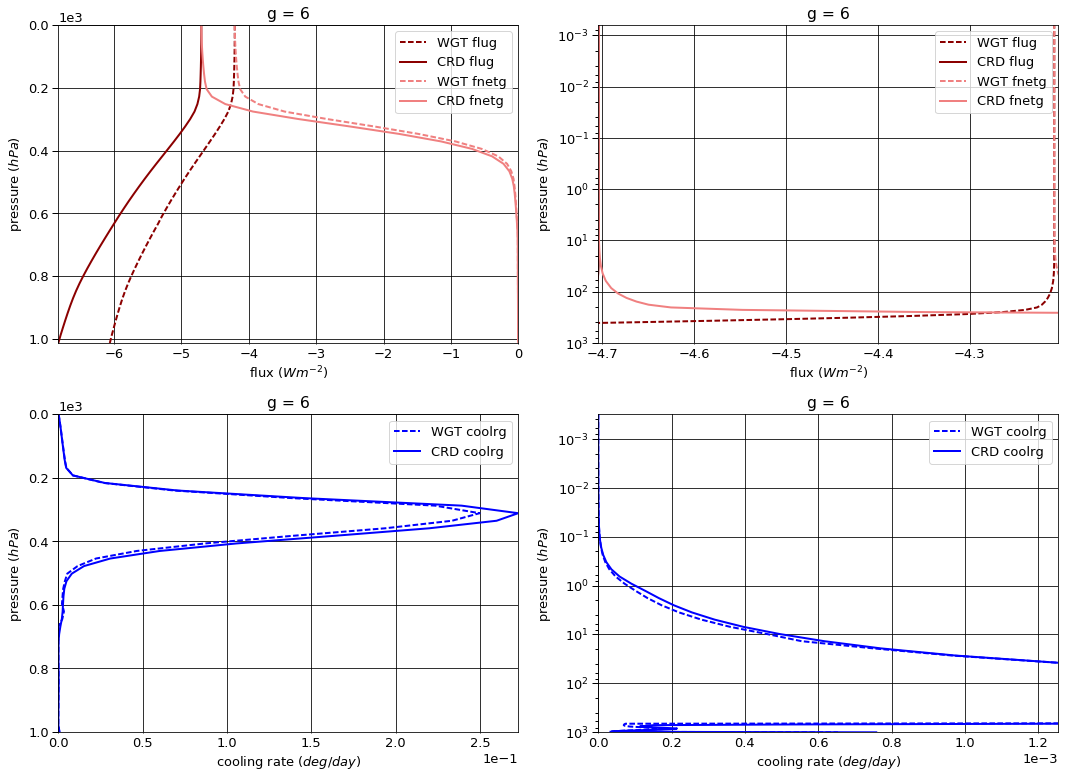

# Figure: flux, cooling rate g-group 7

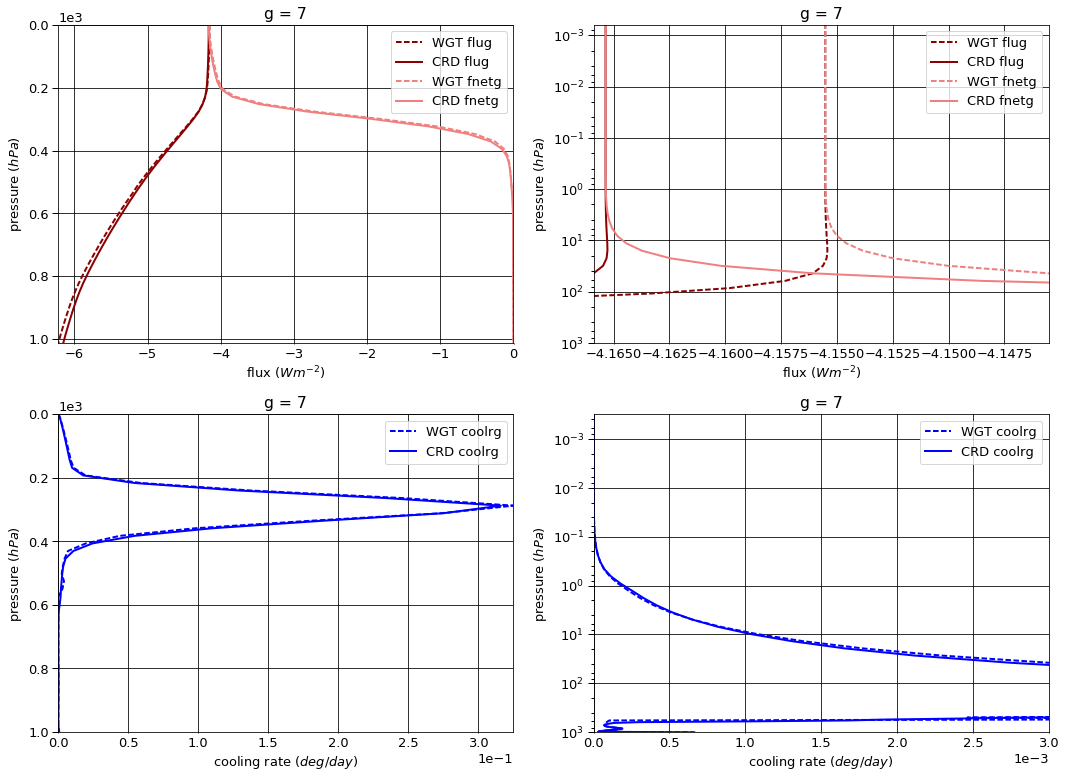

# Figure: flux, cooling rate g-group 8

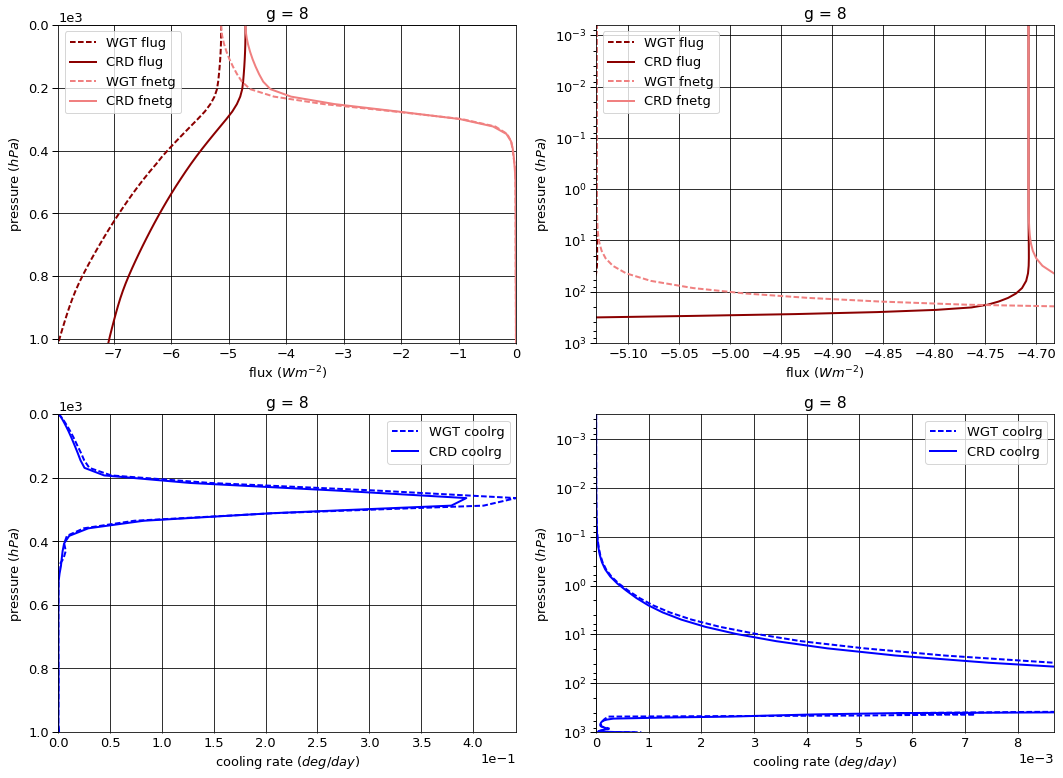

# Figure: flux, cooling rate g-group 9

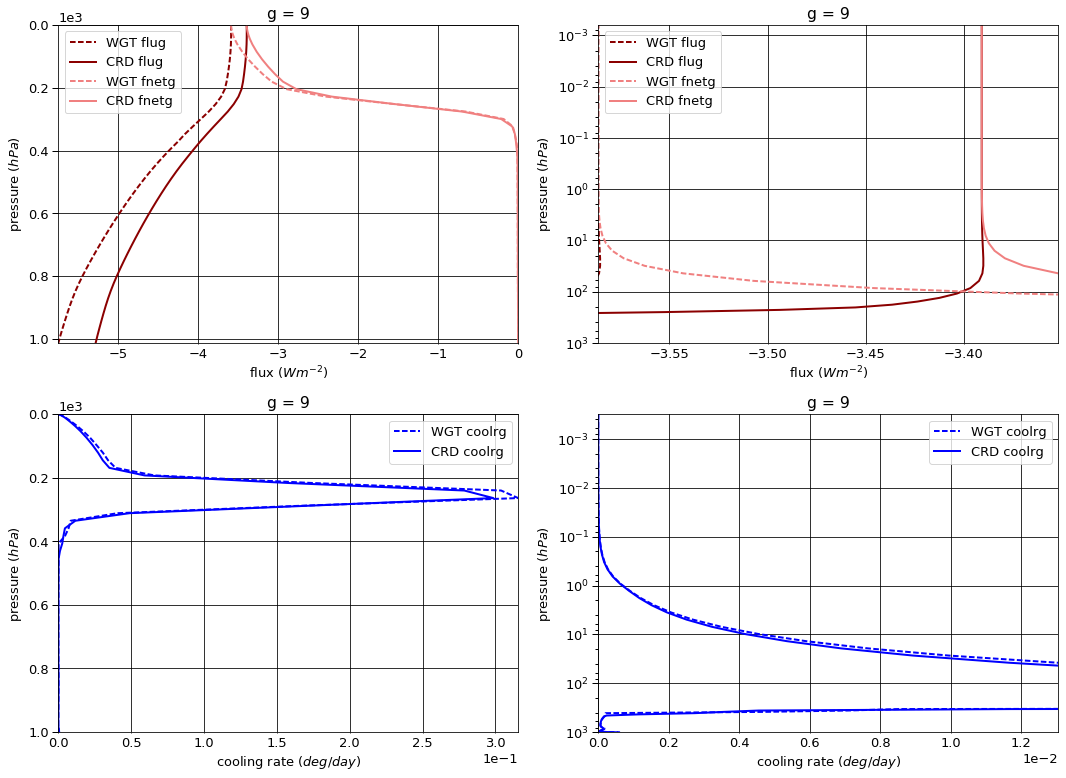

# Figure: flux, cooling rate g-group 10

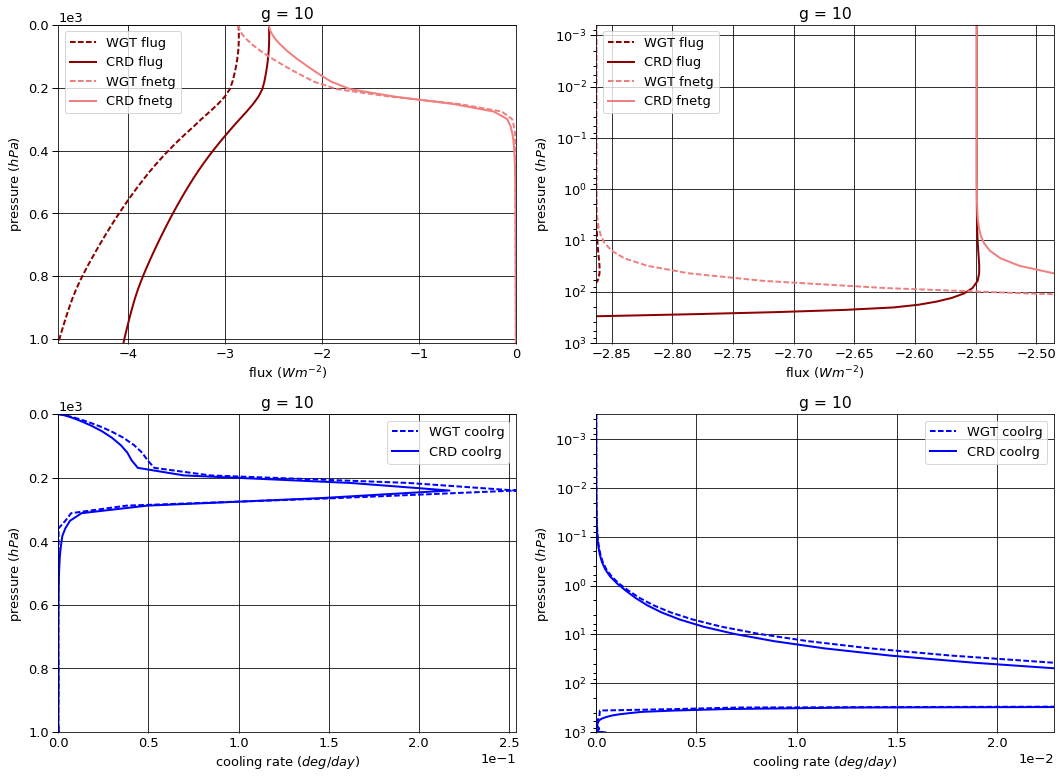

# Figure: flux, cooling rate g-group 11

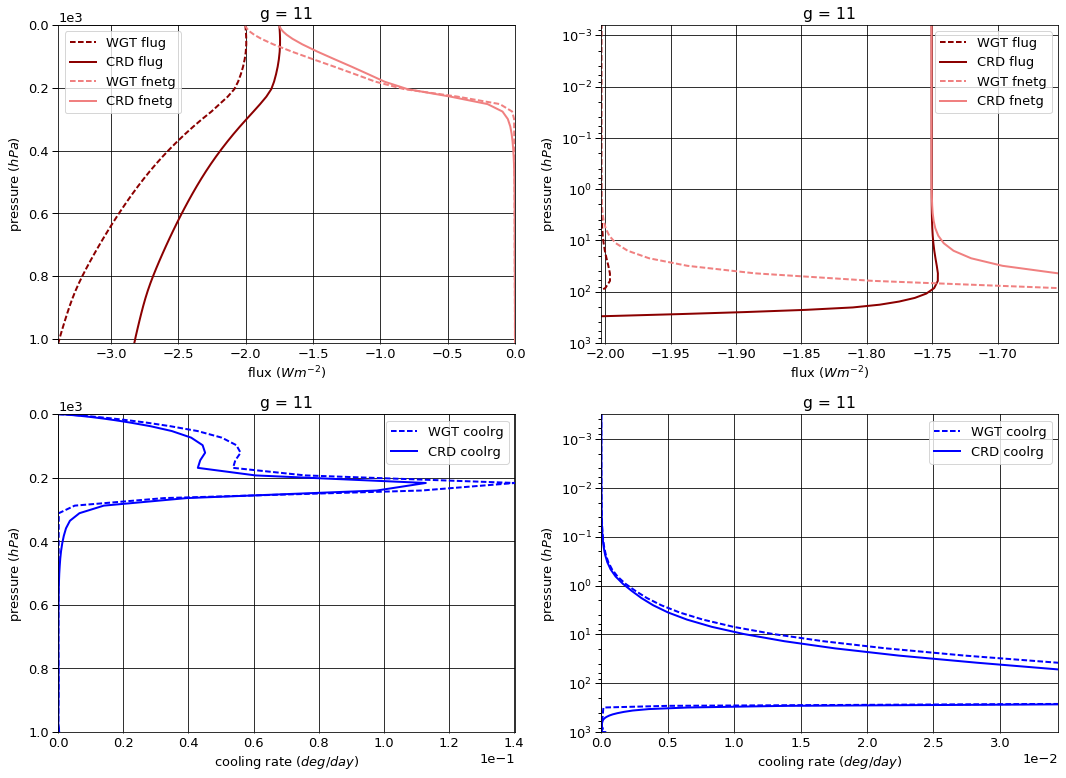

# Figure: flux, cooling rate g-group 12

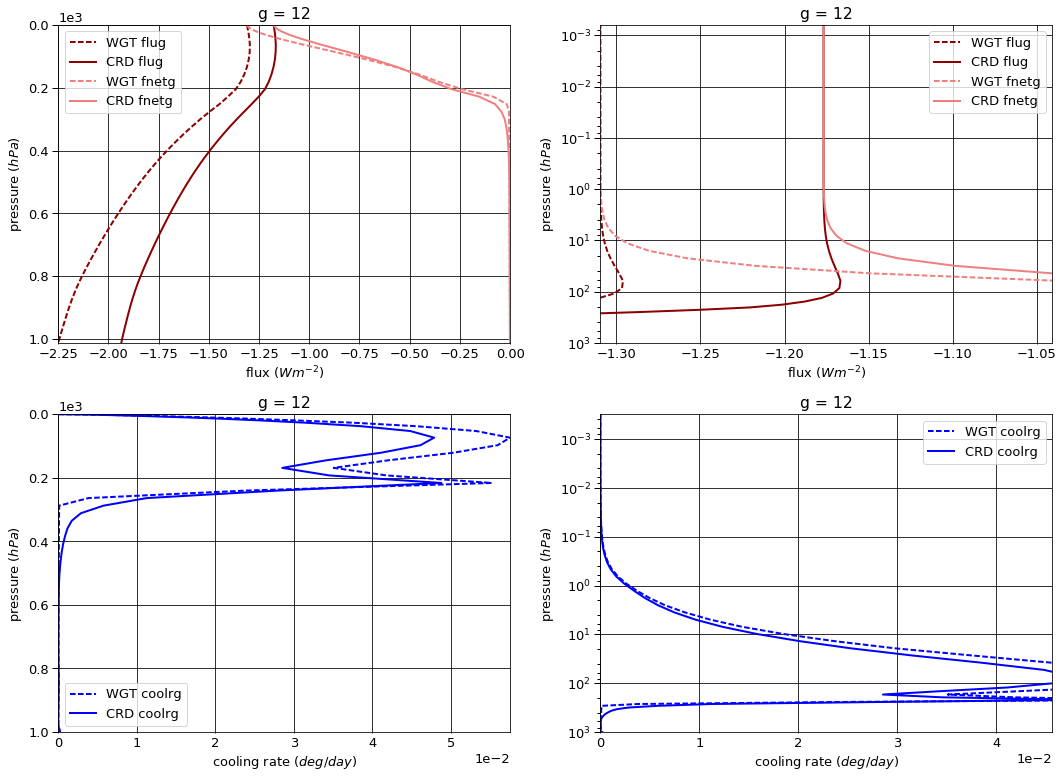

# Figure: flux, cooling rate g-group 13

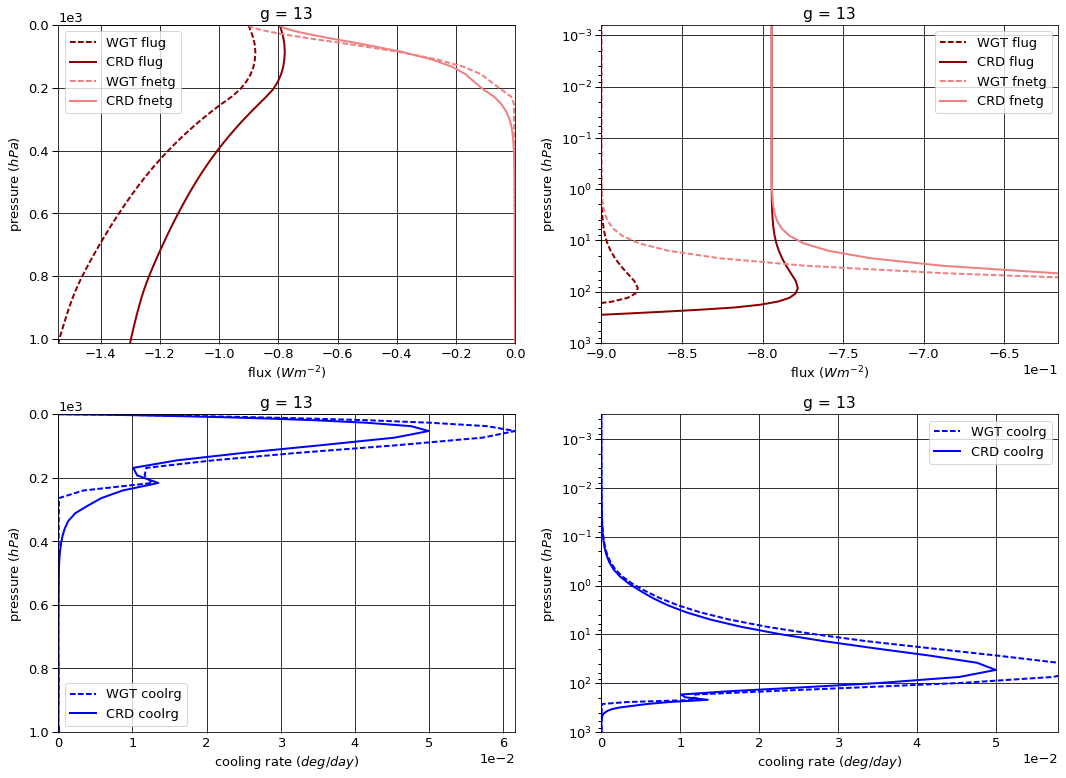

# Figure: flux, cooling rate g-group 14

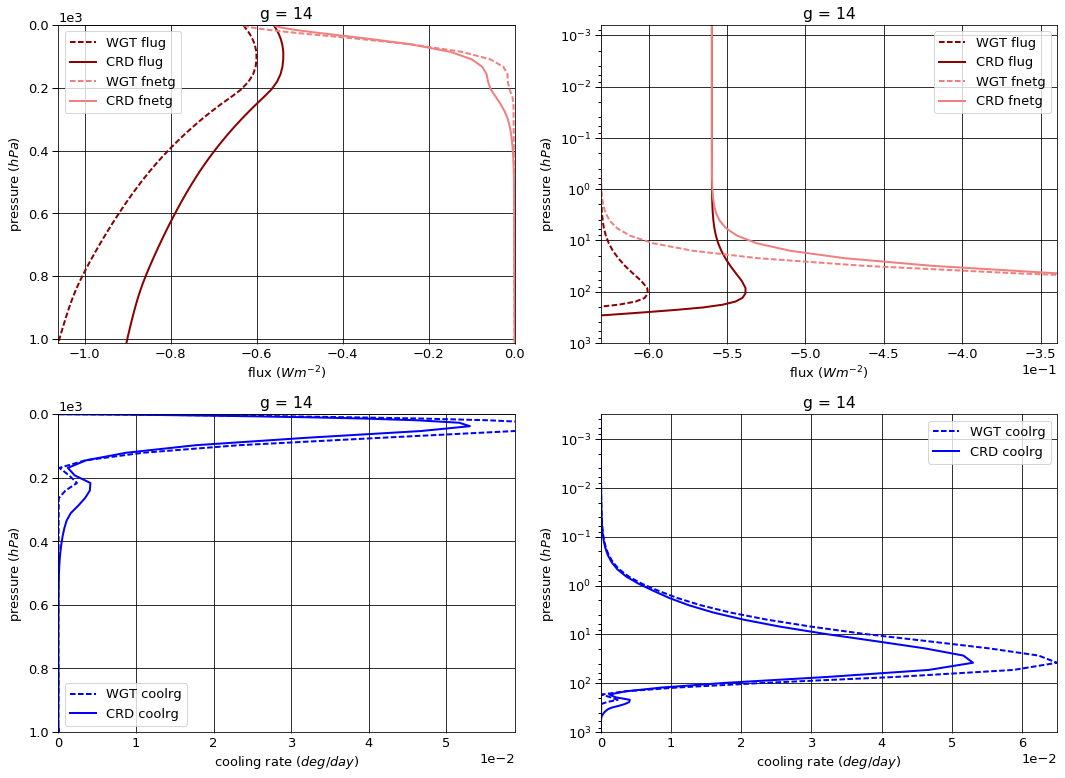

# Figure: flux, cooling rate g-group 15

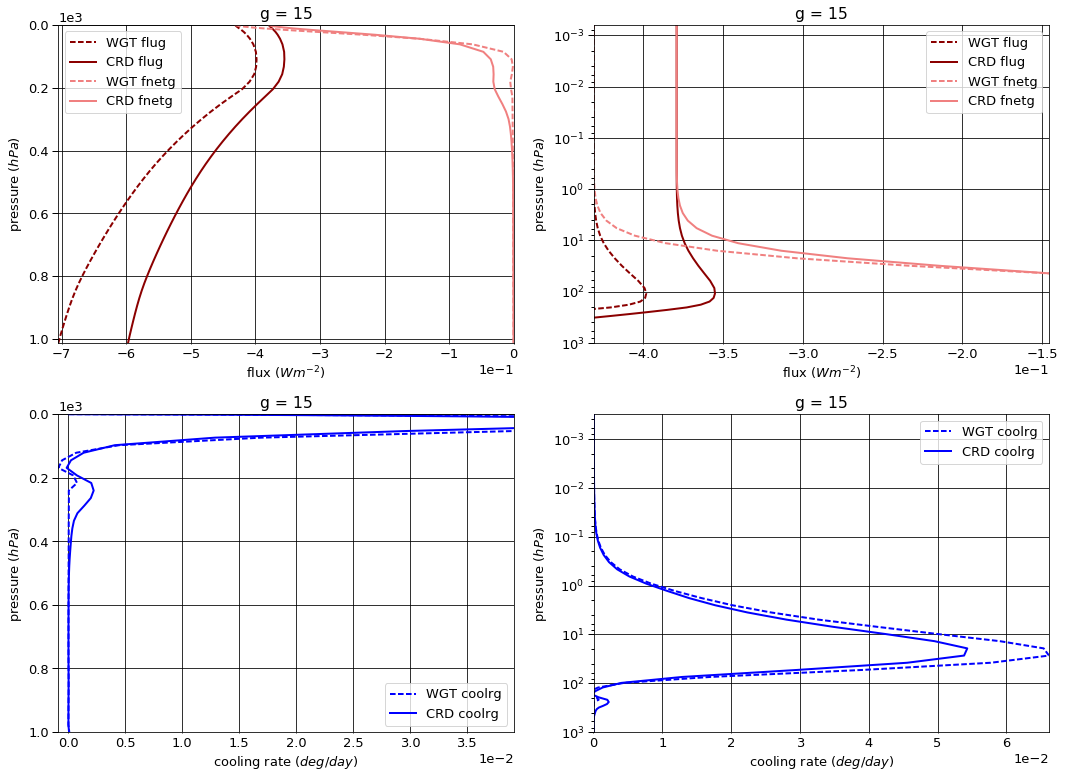

# Figure: flux, cooling rate g-group 16

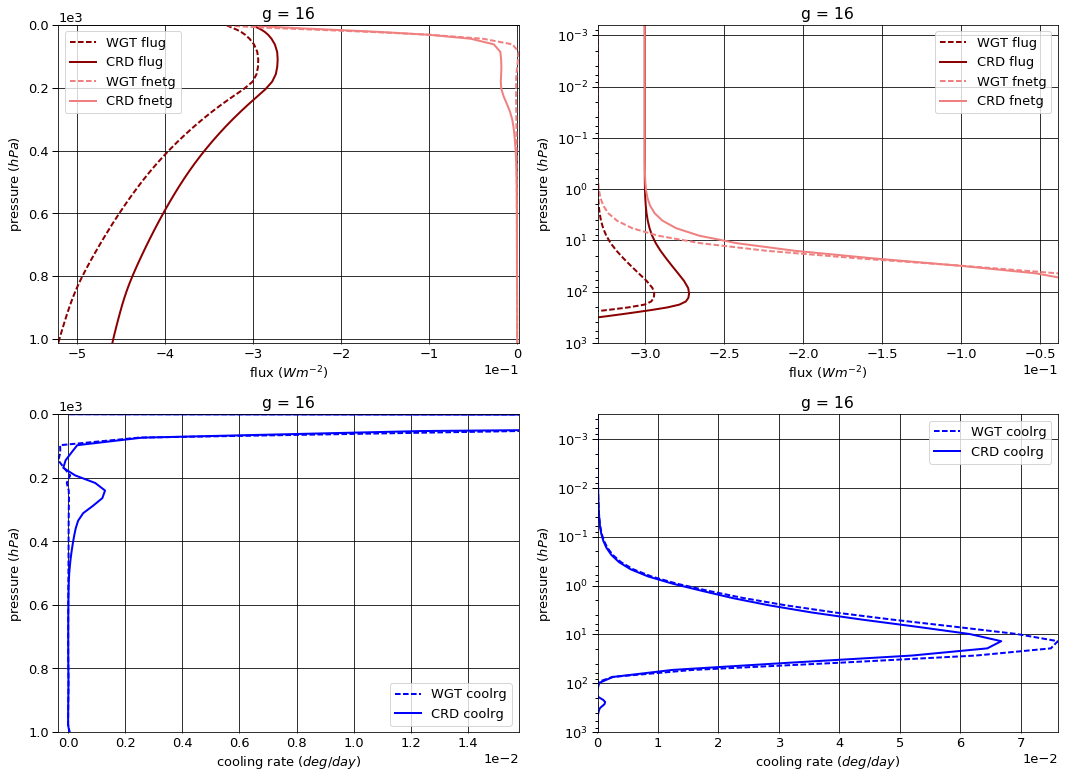

# Figure: flux, cooling rate g-group 17

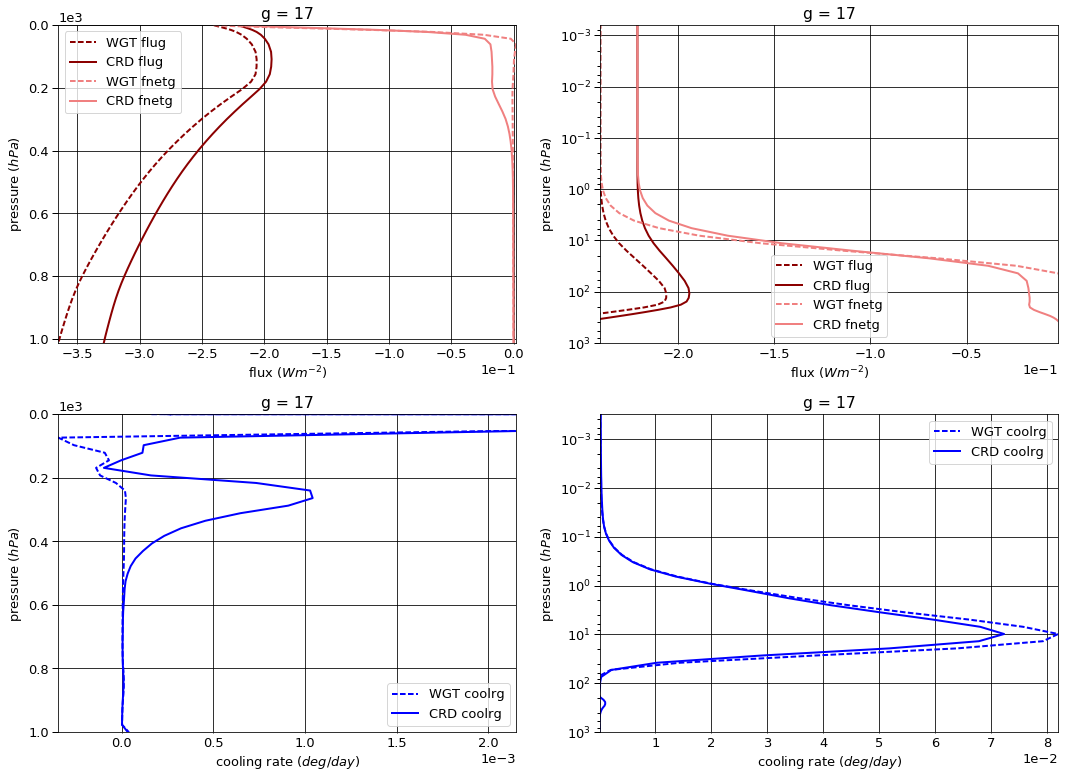

# Figure: flux, cooling rate g-group 18

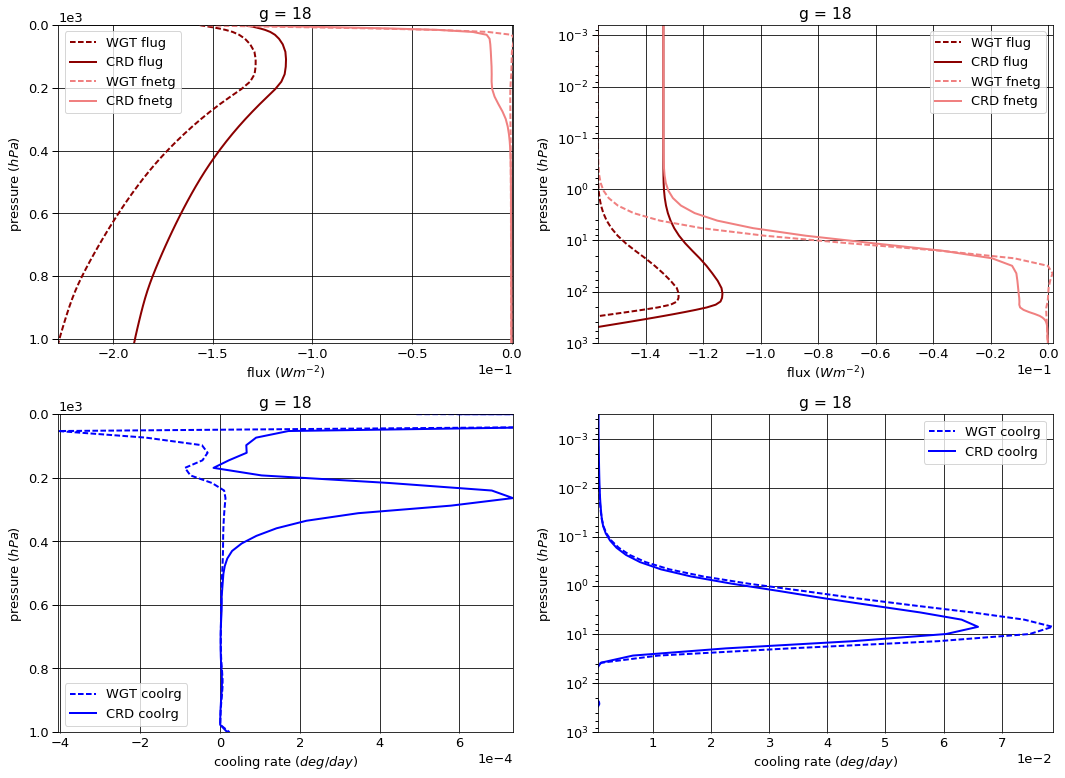

# Figure: flux, cooling rate g-group 19

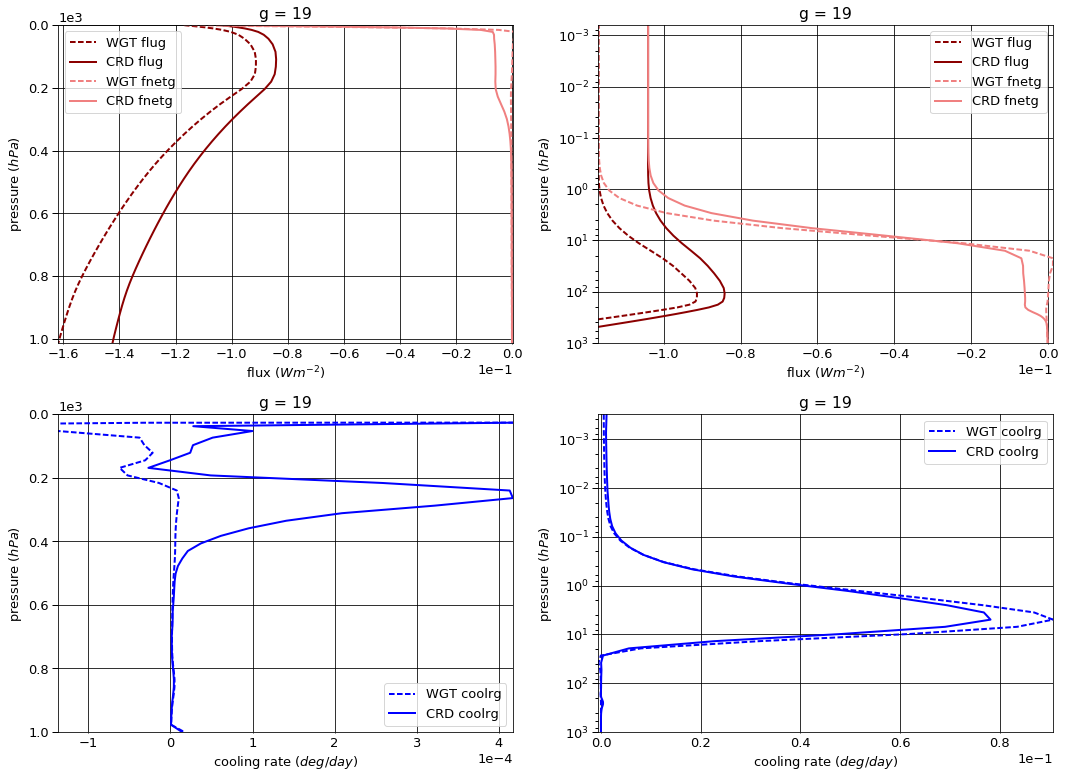

# Figure: flux, cooling rate g-group 20

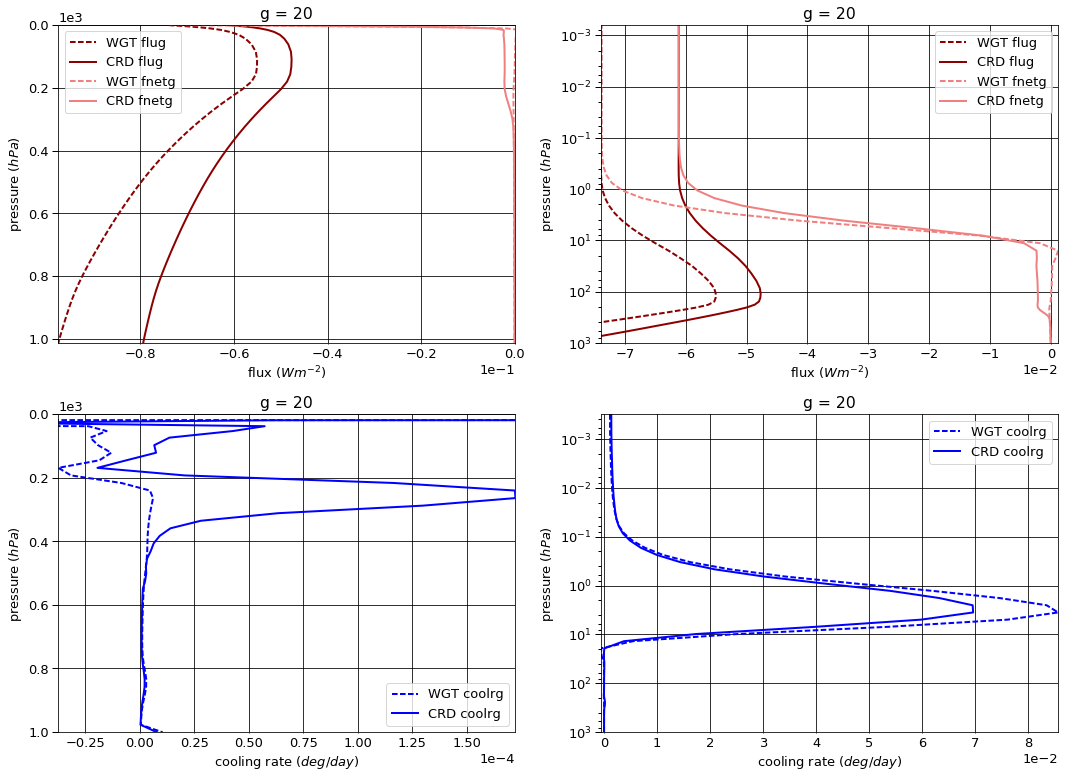

# Figure: flux, cooling rate g-group 21

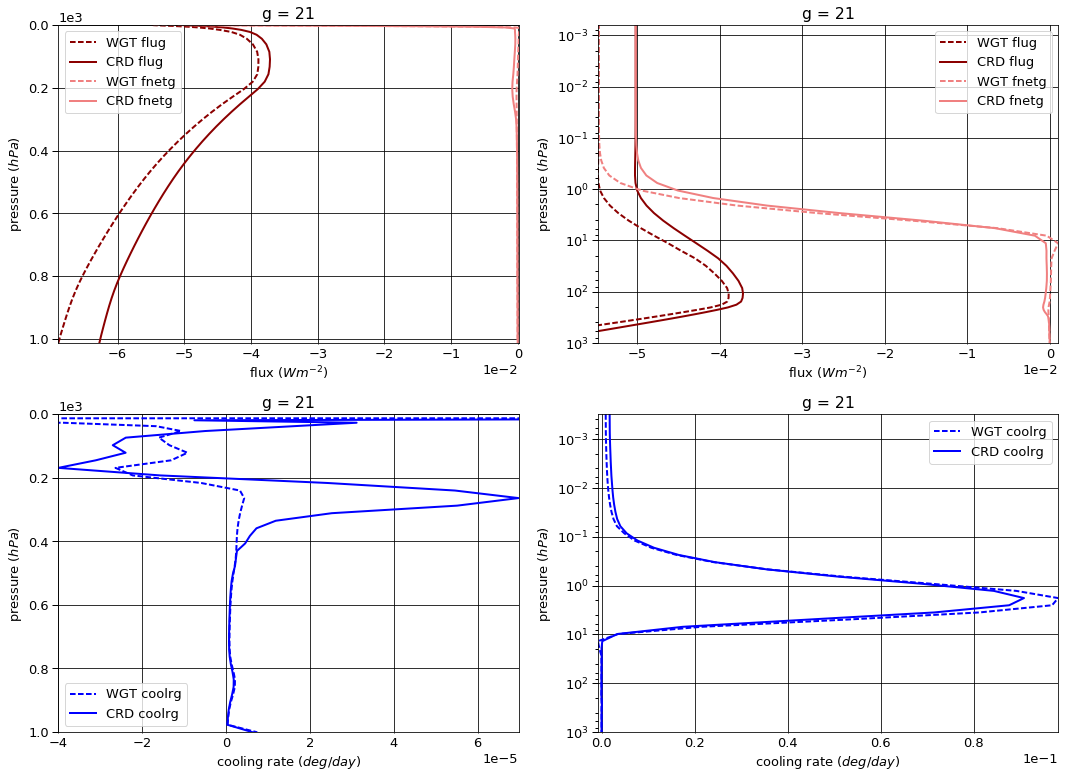

# Figure: flux, cooling rate g-group 22

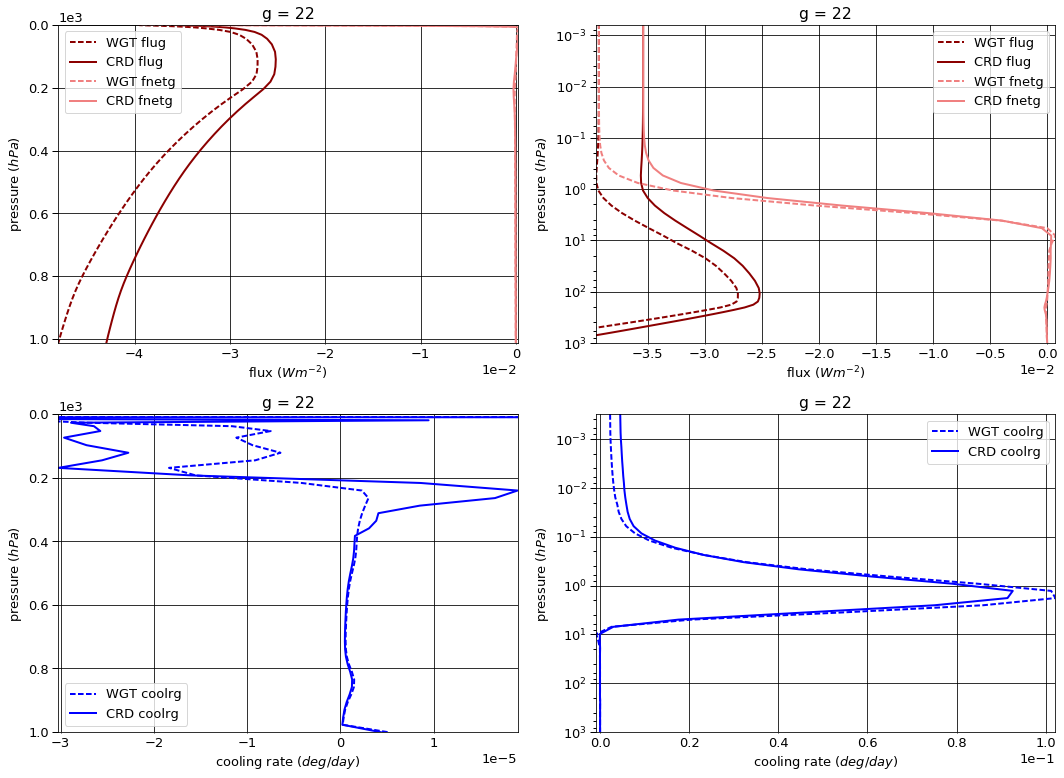

# Figure: flux, cooling rate g-group 23

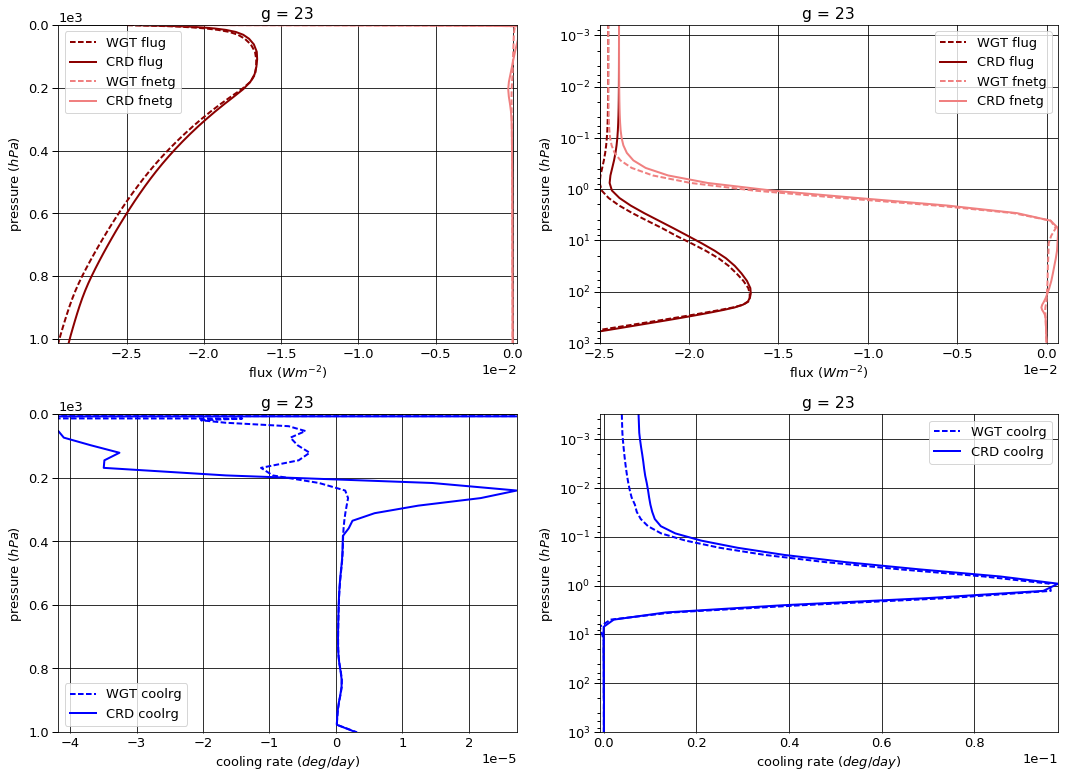

# Figure: flux, cooling rate g-group 24

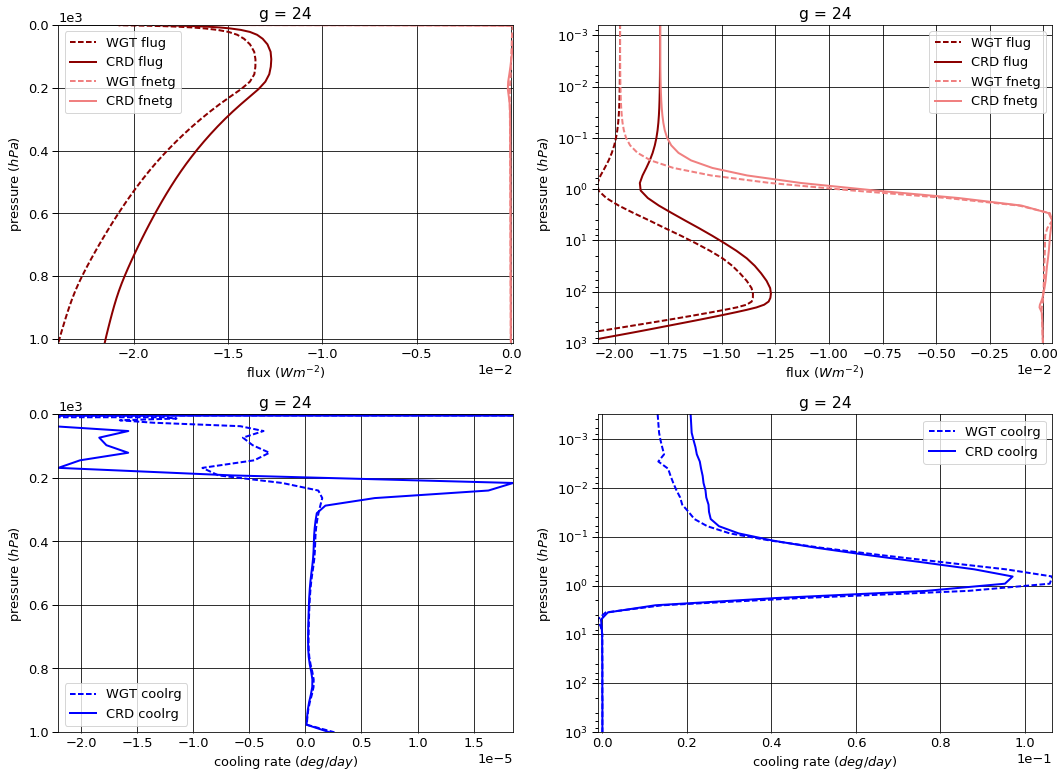

# Figure: flux, cooling rate g-group 25

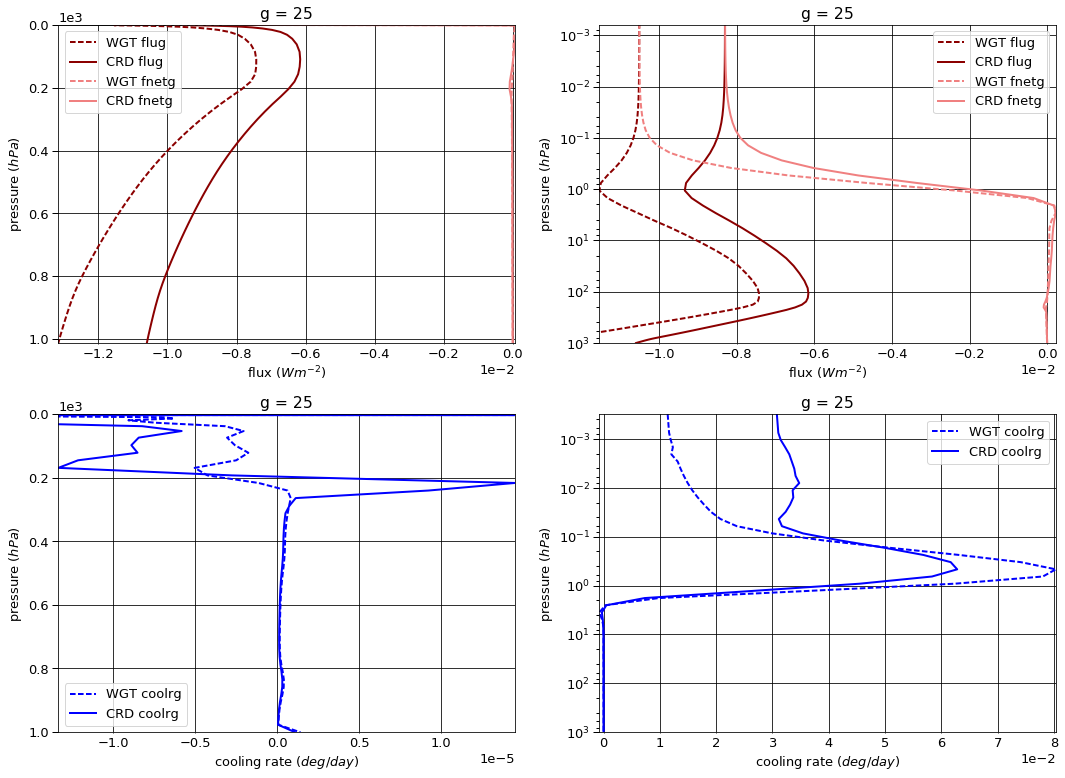

# Figure: flux, cooling rate g-group 26

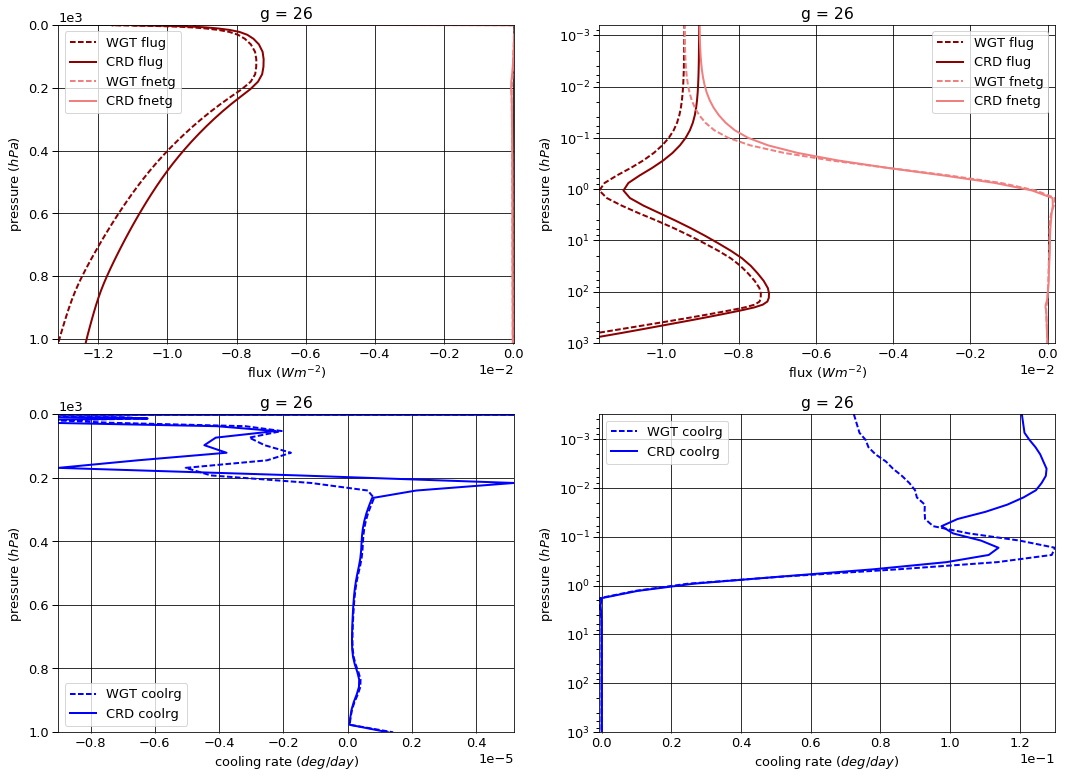

# Figure: flux, cooling rate g-group 27

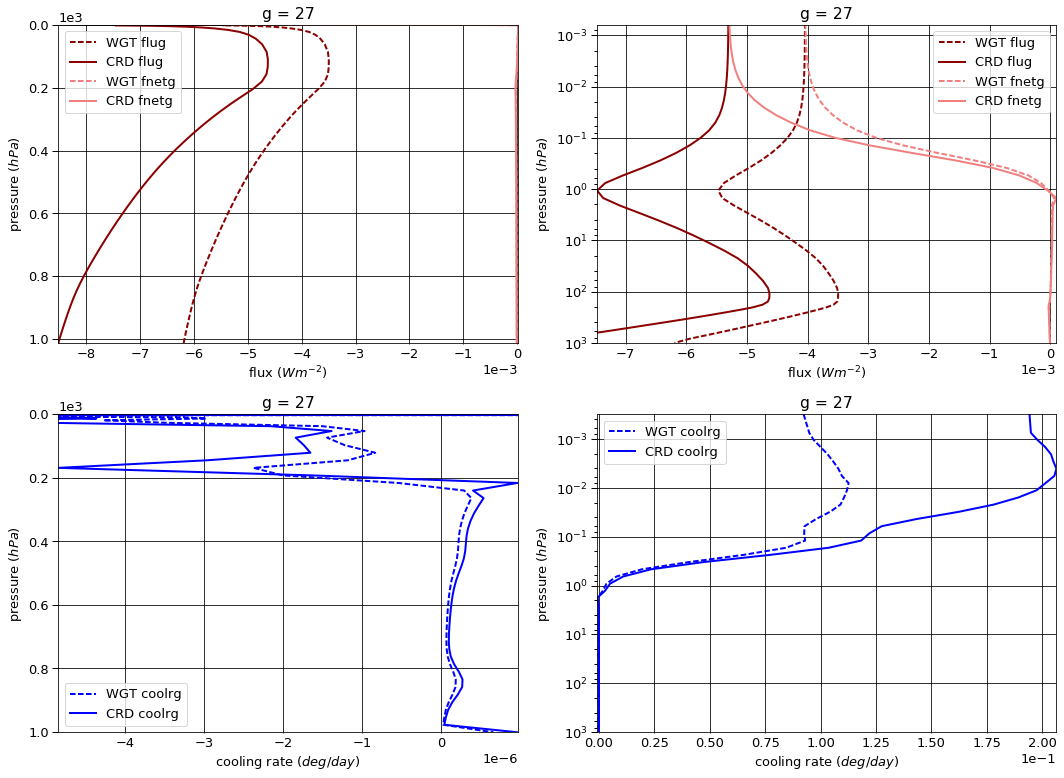

# Figure: flux, cooling rate g-group 28

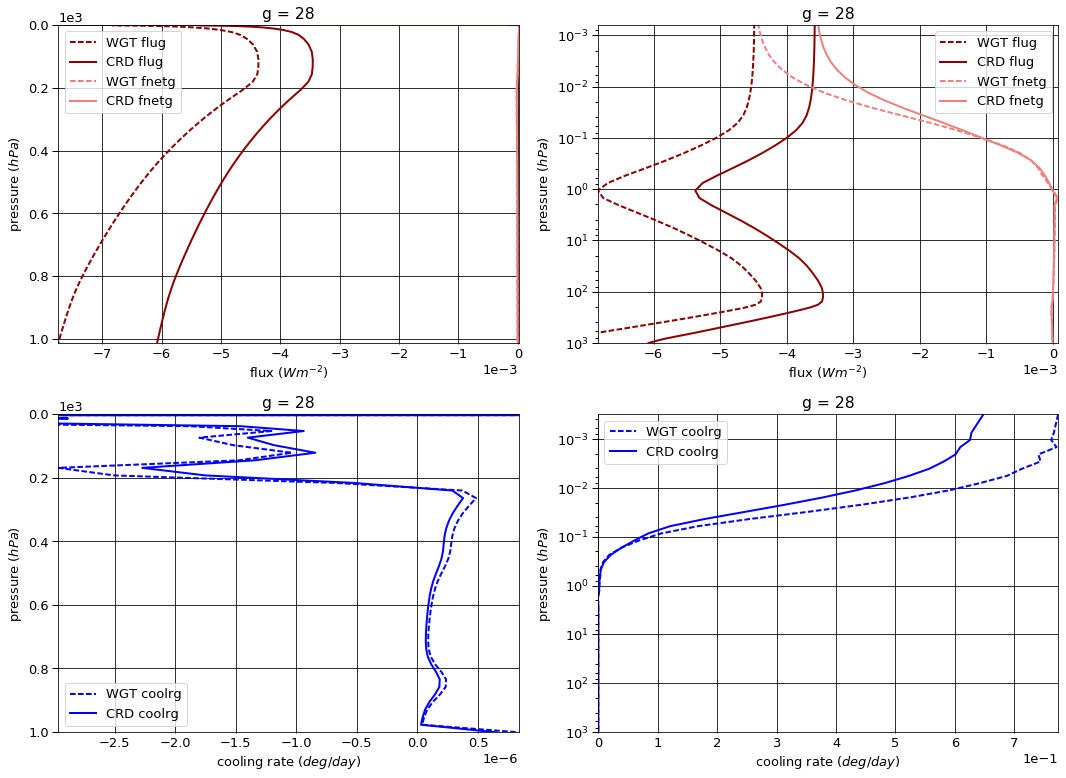

# Figure: flux, cooling rate g-group 29

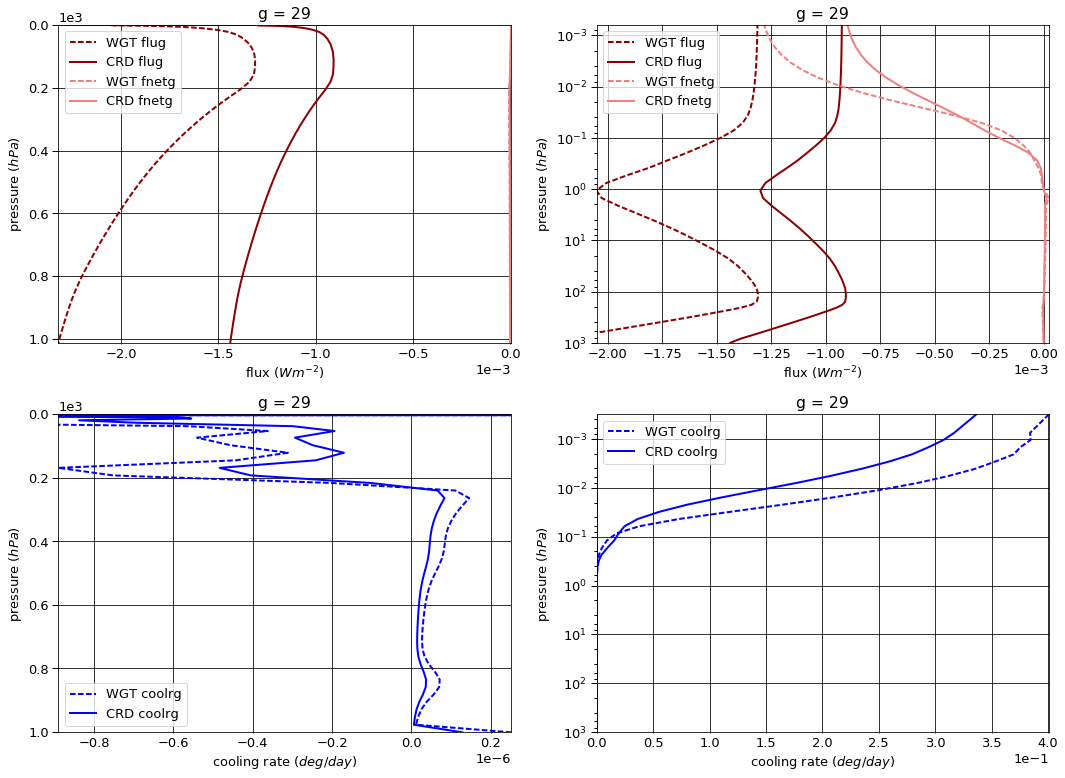

# Figure: flux, cooling rate g-group 30

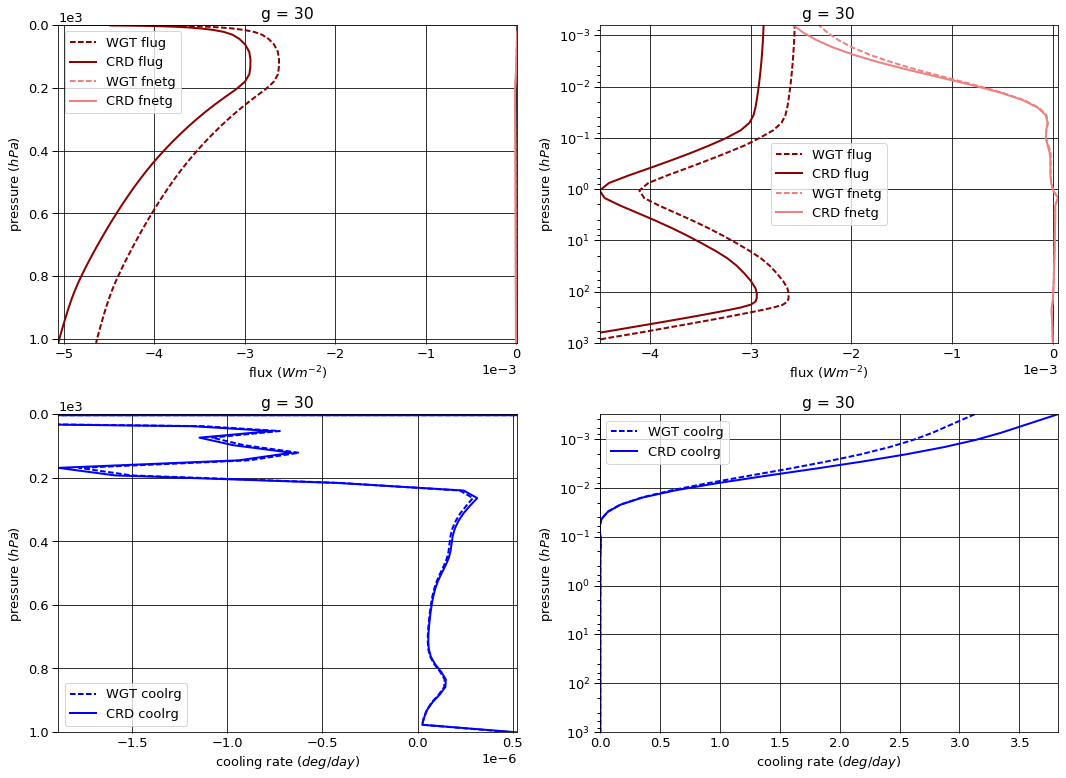

# Figure: flux, cooling rate g-group total

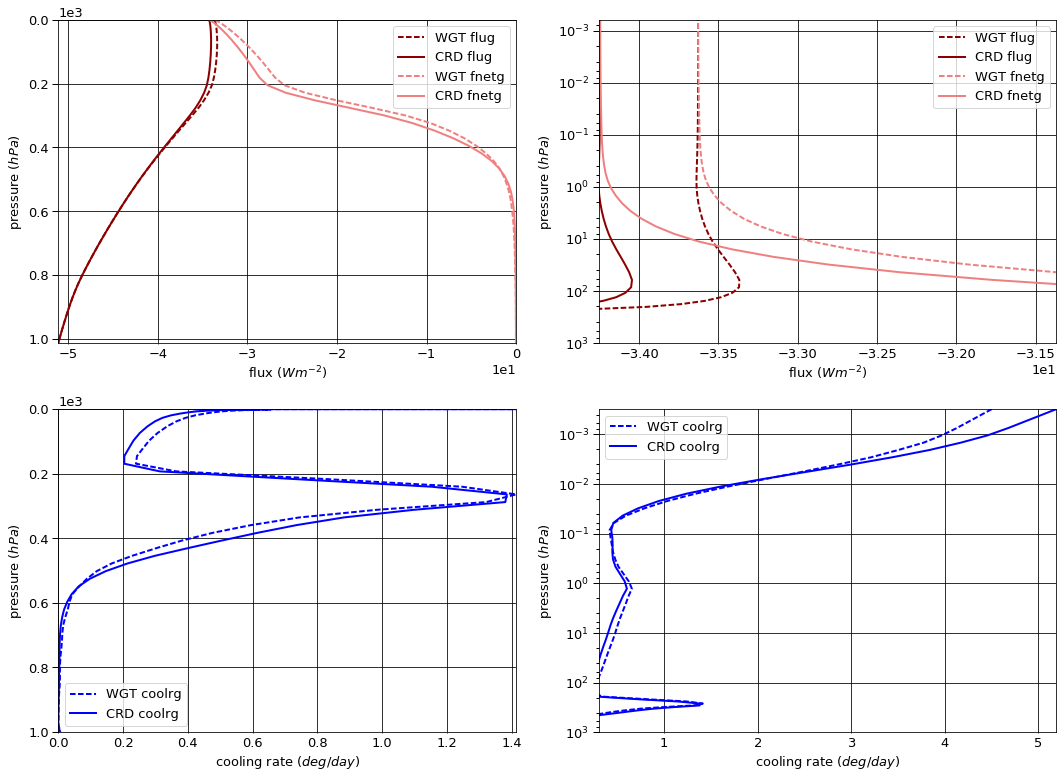

In [37]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [38]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg         fnetg
g  pressure level                                  
1  0.0      1     -0.001021  0.000000 -1.020788e-03
   1013.0   76    -0.001110  0.001103 -7.248249e-06
2  0.0      1     -0.001968  0.000000 -1.967641e-03
   1013.0   76    -0.002204  0.002200 -3.551600e-06
3  0.0      1     -0.014383  0.000000 -1.438332e-02
   1013.0   76    -0.016741  0.016730 -1.112489e-05
4  0.0      1     -3.393883  0.000000 -3.393883e+00
   1013.0   76    -4.702365  4.700762 -1.603220e-03
5  0.0      1     -5.679063  0.000000 -5.679063e+00
   1013.0   76    -8.008606  8.006033 -2.572945e-03
6  0.0      1     -4.704050  0.000000 -4.704050e+00
   1013.0   76    -6.826244  6.824147 -2.097069e-03
7  0.0      1     -4.165361  0.000000 -4.165361e+00
   1013.0   76    -6.151436  6.149634 -1.802310e-03
8  0.0      1     -4.707599  0.000000 -4.707599e+00
   1013.0   76    -7.091387  7.089382 -2.004959e-03
9  0.0      1     -3.390935  0.000000 -3.390935e+00
   1013.0   76    -5.276400  5.274901 -1.499030e-03
10 0.0      1     -2.549043  0.000000 -2.549043e+00
   1013.0   76    -4.049974  4.048829 -1.144175e-03
11 0.0      1     -1.750422  0.000000 -1.750422e+00
   1013.0   76    -2.827201  2.826411 -7.903971e-04
12 0.0      1     -1.176835  0.000000 -1.176835e+00
   1013.0   76    -1.936199  1.935654 -5.454894e-04
13 0.0      1     -0.794401  0.000000 -7.944011e-01
   1013.0   76    -1.300473  1.300109 -3.644427e-04
14 0.0      1     -0.559630  0.000000 -5.596305e-01
   1013.0   76    -0.902909  0.902655 -2.537088e-04
15 0.0      1     -0.379168  0.000000 -3.791678e-01
   1013.0   76    -0.597267  0.597100 -1.674136e-04
16 0.0      1     -0.300117  0.000000 -3.001172e-01
   1013.0   76    -0.459653  0.459523 -1.294364e-04
17 0.0      1     -0.221304  0.000000 -2.213036e-01
   1013.0   76    -0.328921  0.328828 -9.378627e-05
18 0.0      1     -0.133784  0.000000 -1.337841e-01
   1013.0   76    -0.189518  0.189465 -5.284575e-05
19 0.0      1     -0.104065  0.000000 -1.040654e-01
   1013.0   76    -0.142477  0.142436 -4.052088e-05
20 0.0      1     -0.061135  0.000000 -6.113481e-02
   1013.0   76    -0.079404  0.079383 -2.180228e-05
21 0.0      1     -0.050150  0.000000 -5.015033e-02
   1013.0   76    -0.062744  0.062726 -1.760265e-05
22 0.0      1     -0.035393  0.000000 -3.539297e-02
   1013.0   76    -0.042958  0.042946 -1.212542e-05
23 0.0      1     -0.023914  0.000000 -2.391395e-02
   1013.0   76    -0.028745  0.028737 -8.433512e-06
24 0.0      1     -0.017881  0.000000 -1.788067e-02
   1013.0   76    -0.021539  0.021533 -5.995305e-06
25 0.0      1     -0.008305  0.000000 -8.305133e-03
   1013.0   76    -0.010597  0.010594 -3.029511e-06
26 0.0      1     -0.009026  0.000000 -9.025737e-03
   1013.0   76    -0.012368  0.012364 -3.495829e-06
27 0.0      1     -0.005303  0.000000 -5.303407e-03
   1013.0   76    -0.008522  0.008519 -2.693543e-06
28 0.0      1     -0.003576  0.000000 -3.575583e-03
   1013.0   76    -0.006076  0.006075 -1.795553e-06
29 0.0      1     -0.000926  0.000000 -9.256540e-04
   1013.0   76    -0.001439  0.001439 -3.533059e-07
30 0.0      1     -0.002863  0.000000 -2.863082e-03
   1013.0   76    -0.005062  0.005060 -1.442052e-06


WGT


flug      fldg         fnetg
g  pressure level                                  
1  0.0      1     -0.165185  0.000000 -1.651853e-01
   1013.0   76    -0.190428  0.189147 -1.280903e-03
2  0.0      1     -0.228256  0.000000 -2.282560e-01
   1013.0   76    -0.276353  0.275624 -7.297959e-04
3  0.0      1     -0.523488  0.000000 -5.234881e-01
   1013.0   76    -0.671144  0.670400 -7.439555e-04
4  0.0      1     -2.443109  0.000000 -2.443109e+00
   1013.0   76    -3.244249  3.243282 -9.676168e-04
5  0.0      1     -3.962416  0.000000 -3.962416e+00
   1013.0   76    -5.461269  5.459640 -1.628856e-03
6  0.0      1     -4.208041  0.000000 -4.208041e+00
   1013.0   76    -6.061970  6.060162 -1.808019e-03
7  0.0      1     -4.155521  0.000000 -4.155521e+00
   1013.0   76    -6.219112  6.217257 -1.854888e-03
8  0.0      1     -5.130605  0.000000 -5.130605e+00
   1013.0   76    -7.960835  7.958460 -2.374367e-03
9  0.0      1     -3.586237  0.000000 -3.586237e+00
   1013.0   76    -5.742267  5.740554 -1.712666e-03
10 0.0      1     -2.862638  0.000000 -2.862638e+00
   1013.0   76    -4.722004  4.720596 -1.408366e-03
11 0.0      1     -2.002984  0.000000 -2.002984e+00
   1013.0   76    -3.391328  3.390317 -1.011484e-03
12 0.0      1     -1.309522  0.000000 -1.309522e+00
   1013.0   76    -2.249532  2.248861 -6.709364e-04
13 0.0      1     -0.900039  0.000000 -9.000394e-01
   1013.0   76    -1.542779  1.542319 -4.601433e-04
14 0.0      1     -0.630433  0.000000 -6.304327e-01
   1013.0   76    -1.061290  1.060973 -3.165361e-04
15 0.0      1     -0.431173  0.000000 -4.311735e-01
   1013.0   76    -0.705204  0.704994 -2.103314e-04
16 0.0      1     -0.329933  0.000000 -3.299334e-01
   1013.0   76    -0.520969  0.520813 -1.553820e-04
17 0.0      1     -0.240622  0.000000 -2.406217e-01
   1013.0   76    -0.365375  0.365266 -1.089752e-04
18 0.0      1     -0.156545  0.000000 -1.565447e-01
   1013.0   76    -0.227585  0.227517 -6.787863e-05
19 0.0      1     -0.116960  0.000000 -1.169596e-01
   1013.0   76    -0.161787  0.161738 -4.825386e-05
20 0.0      1     -0.073859  0.000000 -7.385904e-02
   1013.0   76    -0.097536  0.097507 -2.909084e-05
21 0.0      1     -0.054615  0.000000 -5.461478e-02
   1013.0   76    -0.068895  0.068874 -2.054829e-05
22 0.0      1     -0.039271  0.000000 -3.927096e-02
   1013.0   76    -0.047994  0.047980 -1.431454e-05
23 0.0      1     -0.024517  0.000000 -2.451719e-02
   1013.0   76    -0.029416  0.029407 -8.773429e-06
24 0.0      1     -0.019751  0.000000 -1.975133e-02
   1013.0   76    -0.023997  0.023990 -7.157271e-06
25 0.0      1     -0.010514  0.000000 -1.051358e-02
   1013.0   76    -0.013160  0.013156 -3.924955e-06
26 0.0      1     -0.009409  0.000000 -9.408971e-03
   1013.0   76    -0.013160  0.013156 -3.924955e-06
27 0.0      1     -0.004042  0.000000 -4.042038e-03
   1013.0   76    -0.006193  0.006191 -1.847038e-06
28 0.0      1     -0.004483  0.000000 -4.483336e-03
   1013.0   76    -0.007741  0.007739 -2.308797e-06
29 0.0      1     -0.001312  0.000000 -1.311926e-03
   1013.0   76    -0.002322  0.002322 -6.926391e-07
30 0.0      1     -0.002555  0.000000 -2.555070e-03
   1013.0   76    -0.004645  0.004643 -1.385278e-06


WGT - CRD


flug      fldg         fnetg
g  pressure level                                  
1  0.0      1     -0.164164  0.000000 -1.641645e-01
   1013.0   76    -0.189318  0.188044 -1.273655e-03
2  0.0      1     -0.226288  0.000000 -2.262884e-01
   1013.0   76    -0.274150  0.273423 -7.262443e-04
3  0.0      1     -0.509105  0.000000 -5.091048e-01
   1013.0   76    -0.654403  0.653670 -7.328306e-04
4  0.0      1      0.950774  0.000000  9.507742e-01
   1013.0   76     1.458116 -1.457480  6.356032e-04
5  0.0      1      1.716647  0.000000  1.716647e+00
   1013.0   76     2.547337 -2.546393  9.440892e-04
6  0.0      1      0.496009  0.000000  4.960093e-01
   1013.0   76     0.764274 -0.763985  2.890498e-04
7  0.0      1      0.009840  0.000000  9.840200e-03
   1013.0   76    -0.067675  0.067623 -5.257710e-05
8  0.0      1     -0.423006  0.000000 -4.230057e-01
   1013.0   76    -0.869448  0.869079 -3.694078e-04
9  0.0      1     -0.195303  0.000000 -1.953028e-01
   1013.0   76    -0.465867  0.465654 -2.136361e-04
10 0.0      1     -0.313595  0.000000 -3.135946e-01
   1013.0   76    -0.672031  0.671767 -2.641910e-04
11 0.0      1     -0.252563  0.000000 -2.525625e-01
   1013.0   76    -0.564127  0.563906 -2.210869e-04
12 0.0      1     -0.132686  0.000000 -1.326863e-01
   1013.0   76    -0.313333  0.313207 -1.254470e-04
13 0.0      1     -0.105638  0.000000 -1.056383e-01
   1013.0   76    -0.242306  0.242211 -9.570058e-05
14 0.0      1     -0.070802  0.000000 -7.080222e-02
   1013.0   76    -0.158381  0.158318 -6.282732e-05
15 0.0      1     -0.052006  0.000000 -5.200573e-02
   1013.0   76    -0.107937  0.107894 -4.291779e-05
16 0.0      1     -0.029816  0.000000 -2.981626e-02
   1013.0   76    -0.061316  0.061290 -2.594564e-05
17 0.0      1     -0.019318  0.000000 -1.931816e-02
   1013.0   76    -0.036453  0.036438 -1.518895e-05
18 0.0      1     -0.022761  0.000000 -2.276057e-02
   1013.0   76    -0.038067  0.038052 -1.503289e-05
19 0.0      1     -0.012894  0.000000 -1.289430e-02
   1013.0   76    -0.019310  0.019302 -7.732976e-06
20 0.0      1     -0.012724  0.000000 -1.272423e-02
   1013.0   76    -0.018132  0.018125 -7.288561e-06
21 0.0      1     -0.004464  0.000000 -4.464443e-03
   1013.0   76    -0.006151  0.006148 -2.945647e-06
22 0.0      1     -0.003878  0.000000 -3.877986e-03
   1013.0   76    -0.005036  0.005034 -2.189124e-06
23 0.0      1     -0.000603  0.000000 -6.032380e-04
   1013.0   76    -0.000670  0.000670 -3.399166e-07
24 0.0      1     -0.001871  0.000000 -1.870663e-03
   1013.0   76    -0.002458  0.002457 -1.161966e-06
25 0.0      1     -0.002208  0.000000 -2.208442e-03
   1013.0   76    -0.002562  0.002561 -8.954437e-07
26 0.0      1     -0.000383  0.000000 -3.832333e-04
   1013.0   76    -0.000792  0.000792 -4.291259e-07
27 0.0      1      0.001261  0.000000  1.261370e-03
   1013.0   76     0.002329 -0.002328  8.465055e-07
28 0.0      1     -0.000908  0.000000 -9.077529e-04
   1013.0   76    -0.001665  0.001664 -5.132441e-07
29 0.0      1     -0.000386  0.000000 -3.862717e-04
   1013.0   76    -0.000883  0.000883 -3.393332e-07
30 0.0      1      0.000308  0.000000  3.080124e-04
   1013.0   76     0.000417 -0.000417  5.677420e-08

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1      8.208697e-14
   1001.112500 75     1.637266e-06
2  0.000312    1      2.873044e-13
   1001.112500 75     1.146025e-06
3  0.000312    1      8.827633e-10
   1001.112500 75     4.261127e-06
4  0.000312    1      1.660127e-08
   1001.112500 75     5.799001e-04
5  0.000312    1      5.748302e-08
   1001.112500 75     9.302300e-04
6  0.000312    1      5.361640e-08
   1001.112500 75     7.582388e-04
7  0.000312    1      1.635750e-07
   1001.112500 75     6.517254e-04
8  0.000312    1      1.132969e-07
   1001.112500 75     7.250651e-04
9  0.000312    1      1.014088e-07
   1001.112500 75     5.420984e-04
10 0.000312    1      9.508415e-07
   1001.112500 75     4.137740e-04
11 0.000312    1      2.242780e-06
   1001.112500 75     2.858393e-04
12 0.000312    1      5.393080e-06
   1001.112500 75     1.972687e-04
13 0.000312    1      1.353809e-05
   1001.112500 75     1.317968e-04
14 0.000312    1      2.039217e-05
   1001.112500 75     9.175046e-05
15 0.000312    1      5.084479e-05
   1001.112500 75     6.054352e-05
16 0.000312    1      6.849592e-05
   1001.112500 75     4.681109e-05
17 0.000312    1      2.405056e-04
   1001.112500 75     3.391557e-05
18 0.000312    1      5.982830e-04
   1001.112500 75     1.911122e-05
19 0.000312    1      1.126778e-03
   1001.112500 75     1.465355e-05
20 0.000312    1      1.361927e-03
   1001.112500 75     7.885004e-06
21 0.000312    1      1.737718e-03
   1001.112500 75     6.365826e-06
22 0.000312    1      4.517469e-03
   1001.112500 75     4.384995e-06
23 0.000312    1      7.493247e-03
   1001.112500 75     3.049579e-06
24 0.000312    1      2.087758e-02
   1001.112500 75     2.168190e-06
25 0.000312    1      3.078036e-02
   1001.112500 75     1.095530e-06
26 0.000312    1      1.205439e-01
   1001.112500 75     1.264232e-06
27 0.000312    1      1.942456e-01
   1001.112500 75     9.738194e-07
28 0.000312    1      6.482825e-01
   1001.112500 75     6.492562e-07
29 0.000312    1      3.366405e-01
   1001.112500 75     1.278065e-07
30 0.000312    1      3.824800e+00
   1001.112500 75     5.215011e-07


WGT


coolrg
g  pressure    layer              
1  0.000312    1      2.626783e-12
   1001.112500 75     4.162939e-04
2  0.000312    1      1.651121e-11
   1001.112500 75     2.387256e-04
3  0.000312    1      9.498448e-09
   1001.112500 75     2.845500e-04
4  0.000312    1      7.931384e-09
   1001.112500 75     3.498815e-04
5  0.000312    1      3.905651e-08
   1001.112500 75     5.889797e-04
6  0.000312    1      3.371889e-08
   1001.112500 75     6.537633e-04
7  0.000312    1      9.803455e-08
   1001.112500 75     6.707105e-04
8  0.000312    1      1.097185e-07
   1001.112500 75     8.585496e-04
9  0.000312    1      1.087458e-07
   1001.112500 75     6.192844e-04
10 0.000312    1      8.189920e-07
   1001.112500 75     5.092525e-04
11 0.000312    1      1.799386e-06
   1001.112500 75     3.657435e-04
12 0.000312    1      3.584848e-06
   1001.112500 75     2.426045e-04
13 0.000312    1      1.001562e-05
   1001.112500 75     1.663836e-04
14 0.000312    1      1.231978e-05
   1001.112500 75     1.144566e-04
15 0.000312    1      3.101196e-05
   1001.112500 75     7.605393e-05
16 0.000312    1      4.712656e-05
   1001.112500 75     5.618474e-05
17 0.000312    1      1.621124e-04
   1001.112500 75     3.940445e-05
18 0.000312    1      4.924015e-04
   1001.112500 75     2.454430e-05
19 0.000312    1      5.600468e-04
   1001.112500 75     1.744816e-05
20 0.000312    1      1.120461e-03
   1001.112500 75     1.051898e-05
21 0.000312    1      8.936902e-04
   1001.112500 75     7.430077e-06
22 0.000312    1      2.246976e-03
   1001.112500 75     5.176009e-06
23 0.000312    1      3.877209e-03
   1001.112500 75     3.172392e-06
24 0.000312    1      1.307427e-02
   1001.112500 75     2.588004e-06
25 0.000312    1      1.138814e-02
   1001.112500 75     1.419228e-06
26 0.000312    1      7.235159e-02
   1001.112500 75     1.419228e-06
27 0.000312    1      9.236981e-02
   1001.112500 75     6.678721e-07
28 0.000312    1      7.737971e-01
   1001.112500 75     8.348401e-07
29 0.000312    1      4.009240e-01
   1001.112500 75     2.504520e-07
30 0.000312    1      3.129145e+00
   1001.112500 75     5.009041e-07


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1      2.544696e-12
   1001.112500 75     4.146566e-04
2  0.000312    1      1.622390e-11
   1001.112500 75     2.375795e-04
3  0.000312    1      8.615685e-09
   1001.112500 75     2.802889e-04
4  0.000312    1     -8.669886e-09
   1001.112500 75    -2.300186e-04
5  0.000312    1     -1.842651e-08
   1001.112500 75    -3.412503e-04
6  0.000312    1     -1.989751e-08
   1001.112500 75    -1.044756e-04
7  0.000312    1     -6.554049e-08
   1001.112500 75     1.898520e-05
8  0.000312    1     -3.578430e-09
   1001.112500 75     1.334844e-04
9  0.000312    1      7.336980e-09
   1001.112500 75     7.718603e-05
10 0.000312    1     -1.318495e-07
   1001.112500 75     9.547845e-05
11 0.000312    1     -4.433950e-07
   1001.112500 75     7.990418e-05
12 0.000312    1     -1.808232e-06
   1001.112500 75     4.533583e-05
13 0.000312    1     -3.522467e-06
   1001.112500 75     3.458683e-05
14 0.000312    1     -8.072391e-06
   1001.112500 75     2.270612e-05
15 0.000312    1     -1.983283e-05
   1001.112500 75     1.551041e-05
16 0.000312    1     -2.136935e-05
   1001.112500 75     9.373646e-06
17 0.000312    1     -7.839323e-05
   1001.112500 75     5.488878e-06
18 0.000312    1     -1.058815e-04
   1001.112500 75     5.433077e-06
19 0.000312    1     -5.667309e-04
   1001.112500 75     2.794610e-06
20 0.000312    1     -2.414658e-04
   1001.112500 75     2.633981e-06
21 0.000312    1     -8.440277e-04
   1001.112500 75     1.064251e-06
22 0.000312    1     -2.270493e-03
   1001.112500 75     7.910135e-07
23 0.000312    1     -3.616038e-03
   1001.112500 75     1.228136e-07
24 0.000312    1     -7.803318e-03
   1001.112500 75     4.198142e-07
25 0.000312    1     -1.939221e-02
   1001.112500 75     3.236984e-07
26 0.000312    1     -4.819229e-02
   1001.112500 75     1.549967e-07
27 0.000312    1     -1.018758e-01
   1001.112500 75    -3.059473e-07
28 0.000312    1      1.255146e-01
   1001.112500 75     1.855839e-07
29 0.000312    1      6.428351e-02
   1001.112500 75     1.226455e-07
30 0.000312    1     -6.956553e-01
   1001.112500 75    -2.059702e-08

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-34.245503,0.000000,-34.245503
1013.0,76,-51.090539,51.075277,-0.015262



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-33.628035,0.000000,-33.628035
1013.0,76,-51.090539,51.072886,-0.017653



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,6.174683e-01,0.000000,0.617468
1013.0,76,-9.160000e-08,-0.002391,-0.002391


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,5.193409
1001.112500,75,0.005518



WGT


,,coolrg
pressure,layer,
0.000312,1,4.502510
1001.112500,75,0.006327



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.690899
1001.112500,75,0.000809


In [39]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.003727,0.000025
2,0.005409,0.000049
3,0.013136,0.000368
4,0.063500,0.088113
5,0.106894,0.152985
6,0.118652,0.132357
7,0.121727,0.121060
8,0.155818,0.141033
9,0.112394,0.104787


In [40]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,0.000000e+00
2,2.610843e-23
3,5.705625e-23
4,1.246883e-22
5,2.724885e-22
6,5.954849e-22
7,1.301347e-21
8,2.843909e-21
9,6.214958e-21


In [41]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')